# 李群与李代数

在SLAM中，我们常常要解决“什么样的相机位姿最符合当前数据的问题”，它可以表述成
$$\min_{R\in SO(3), t \in \mathscr{R}^3} f(R, t)$$
这样的约束优化问题，李群李代数的引入可以把位姿估计变成无约束的优化问题，从而简化求解。


## 一、定义
### 1.1 李群
李群定义为“光滑的群”，群是一种数学上的代数结构，用一个有序对$(G, *)$表示,其中$G$是集合，$*$是集合$G$上的二元运算，满足封闭性，结合律，存在幺元，任意元素有逆元。SLAM中常用的李群有
* GL(n),一般线性群，所有可逆矩阵关于矩阵乘法构成的群。
* SO(n), 特殊正交群，所有旋转矩阵关于矩阵乘法构成群。
* SE(n)，特殊欧式群，所有欧式变换关于矩阵乘法构成群。

### 1.2 李代数
李代数描述了李群局部性质，是李群单位元附近的正切空间(Tangent space)。李代数用一个三元组(triplet)$(\mathbb{V}, \mathbb{F}, [])$表示，其中$\mathbb{V}$是一个集合，$\mathbb{F}$是一个数域，[]是集合$\mathbb{V}$上一个二元运算。满足
封闭性，双线性，自反性以及雅各比等价。$\mathscr{R}^3$上$(\mathscr{R}^3, \mathscr{R}, ×)$就是一个最常见的李代数。

#### 1.2.1 so(3)李代数
李代数so(3)对应集合有两种等价表述，一种是用$R^{3}$中的向量，一种是用$R^{3}$向量对应的反对称矩阵。
$$so(3) = \{\phi \in \mathscr{R}^3, \Phi = \phi^{\wedge} \in \mathscr{R}^{3 \times 3}\}$$

根据不同的表述李括号定义为如下对易算法的形式：

$$[\phi_1, \phi_2] = (\Phi_1\Phi_2 - \Phi_2\Phi_1)^{\vee}$$

so(3)李代数与李群SO(3)的关系由指数映射给出

$$R = exp(\phi^{\wedge}) = \sum_{n=0}^{\infty} \frac{(\phi^{\wedge})^{n}}{n!} = cos\theta I + (1 - cos\theta)aa^T + sin\theta a^{\wedge}$$

即罗德里格斯公式

#### 1.2.2 se(3)李代数
与so(3)类似，se(3)李代数的集合同样有两种表示，一种是$R^6$的向量，一种是$R^{4 \times 4}$矩阵，符号$\wedge$表示向量生成矩阵。
$$se(3) = \{\xi = \left[
 \begin{matrix}
   \rho \\
   \phi \\
   \end{matrix}
  \right]\in \mathscr{R}^6, \rho \in \mathscr{R}^3, \phi \in so(3), \xi^{\wedge} = \left[ 
  \begin{matrix}
   \phi^{\wedge} & \rho \\
   \mathbf{0}^{T} & 0\\
   \end{matrix}
   \right] \in \mathscr{R}^{4 \times 4}
 \}$$
 
 而$se(3)$李括号同样是对易算符定义
 $$[\xi_1, \xi_2] = (\xi_1^{\wedge}\xi_2^{\wedge} - \xi_2^{\wedge}\xi_1^{\wedge})^{\vee}$$
 
 李群SE(3)与李代数se(3)的关系由指数映射给出
 $$exp(\xi^{\wedge}) = \sum_{n=0}^{\infty} \frac{(\xi^{\wedge})^{n}}{n!} = 
 \left[ 
  \begin{matrix}
   R & \mathbf{J}\rho \\
   \mathbf{0}^{T} & 1\\
   \end{matrix}
   \right]$$
   
 其中
 
 $$\mathbf{J} = \frac{sin \theta}{\theta} I + (1 - \frac{sin \theta}{\theta})aa^{T} + \frac{(1 - cos\theta)}{\theta}a^{\wedge}$$
 易得$\lim_{\theta \rightarrow 0}J(\theta) = exp(\phi^{\wedge})$

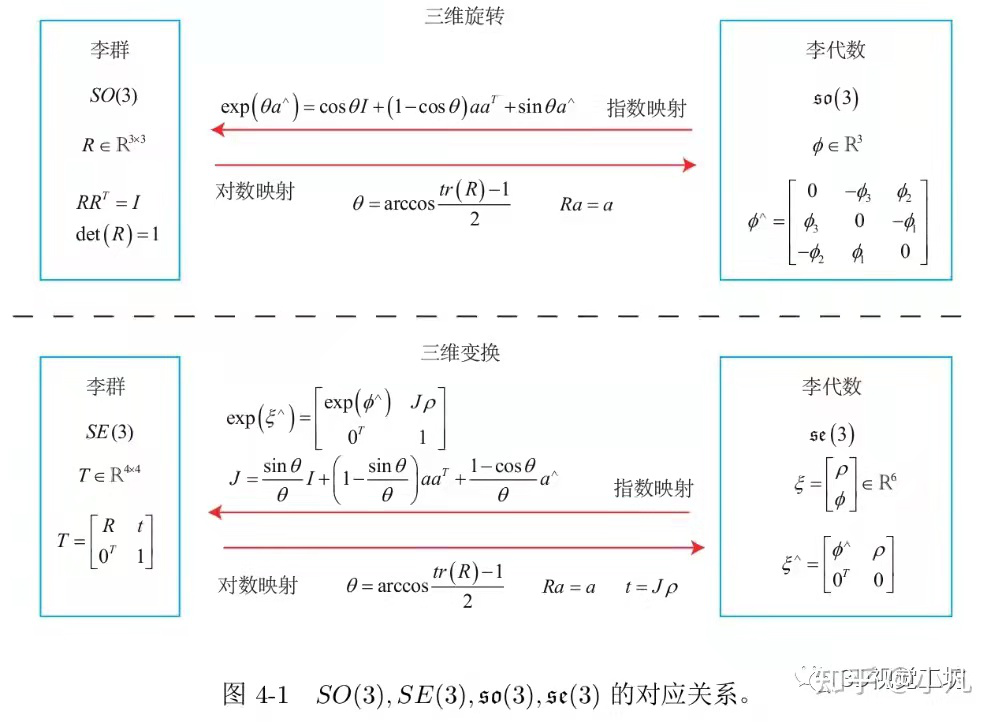

In [1]:
from PIL import Image
display(Image.open("../resources/Lie.png"))

## 三、李代数求导与扰动模型
引入李代数的目的是为了求导，为了优化。